<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/brief_fao_second_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief FAO

Graphique Pareto malnutrition, population, densité population


In [16]:
import sys
import pandas as pd
import sqlite3

filecsv = ['https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_animal.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_cereal.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_population.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_sous_alimentation.csv',
           'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_vegetal.csv']
#print(f'list : {filecsv}')

conn = sqlite3.connect('bdd.sqlite')

'''
to_sql()
read_sql_query()
conn.execute("SELECT/INSERT/...")
'''

names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

for i in filecsv:
    #print(i[79:-4])
    df_tabs = pd.read_csv(i, names = names, header = 0)
    #df_tabs.index = df_tabs['Code Pays']
    df_tabs.to_sql(i[79:-4], con=conn, if_exists='replace')
    #crée un fichier bdd.sqlite avec nos 5 tables
    #print(i[38:-4])
   


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [40]:
#import sys
import pandas as pd
#from colorama import Fore, Back, Style
#afficher des couleurs dans le terminal
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect('bdd.sqlite')

"""
df_population = pd.read_sql_query('''select Pays,"Code Pays",Valeur AS valeur_population
                           from population;''', con=conn)
#print(df_population)

df_cereal = pd.read_sql_query('''select "Code Pays",
                              Valeur AS valeur_cereal from cereal where Élément='Production' AND
                              Produit='Blé' ORDER BY "Code Pays";''', con=conn)
#print(df_cereal)
"""


df_graph = pd.read_sql_query('''SELECT population.Pays,
                             population."Code Pays",
                             population.Valeur AS valeur_population,
                             cereal.Valeur AS valeur_cereal,
                             
                             sous_alimentation."Code Pays",
                             sous_alimentation.Valeur AS valeur_sous_alimentation
                             
                             
                             FROM population
                             
                             INNER JOIN sous_alimentation
                             ON (population."Code Pays" = sous_alimentation."Code Pays")
                             
                             INNER JOIN cereal
                             ON (population."Code Pays" = cereal."Code Pays")
                             WHERE (cereal.Élément='Production'
                             AND cereal.Produit='Blé'
                             AND cereal.Valeur > 0
                             AND sous_alimentation.valeur > 0)
                             ORDER BY population."Code Pays";''', con=conn)

df_graph

,Pays,Code Pays,valeur_population,valeur_cereal,Code Pays,valeur_sous_alimentation
0,Armenia,1,2977,312.0,1,0.1
1,Afghanistan,2,30552,5169.0,2,8.1
2,Albania,3,3173,294.0,3,0.2
3,Algeria,4,39208,3299.0,4,1.8
4,Angola,7,21472,4.0,7,8.0
...,...,...,...,...,...,...
59,Yemen,249,24407,232.0,249,7.1
60,Zambia,251,14539,274.0,251,7.0
61,Serbia,272,9511,2690.0,272,0.5
62,Sudan,276,37964,265.0,276,9.3


In [44]:
#sort DataFrame by count descending
df_graph = df_graph.sort_values(by='valeur_sous_alimentation', ascending=False)

#add column to display cumulative percentage
df_graph['cumperc'] = df_graph['valeur_sous_alimentation'].cumsum()/df_graph['valeur_sous_alimentation'].sum()*100

df_graph

,Pays,Code Pays,valeur_population,valeur_cereal,Code Pays,valeur_sous_alimentation,cumperc
20,India,100,1252140,93510.0,100,213.1,27.008872
63,China,351,1416667,121931.0,351,137.3,44.410646
13,"China, mainland",41,1385567,121926.0,41,136.2,61.673004
41,Pakistan,165,182143,24231.0,165,38.4,66.539924
6,Bangladesh,16,156595,1255.0,16,26.4,69.885932
...,...,...,...,...,...,...,...
17,Georgia,73,4341,81.0,73,0.3,99.911280
47,Slovakia,199,5450,1684.0,199,0.2,99.936629
54,Oman,221,3632,2.0,221,0.2,99.961977
2,Albania,3,3173,294.0,3,0.2,99.987326


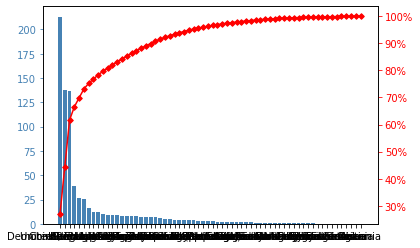

In [46]:
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_graph.Pays, df_graph['valeur_sous_alimentation'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_graph.Pays, df_graph['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

In [ ]:
'''import pandas as pd
csv_animal = 'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_animal.csv'
csv_cereal = 'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_cereal.csv'
csv_population = 'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_population.csv'
csv_sous_alimentation = 'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_sous_alimentation.csv'
csv_vegetal = 'https://raw.githubusercontent.com/remijul/dataset/master/fao_2013/FAOSTAT_2013_vegetal.csv'

df_csv_animal = pd.read_csv(csv_animal)
df_csv_cereal = pd.read_csv(csv_cereal)
df_csv_population = pd.read_csv(csv_population)
df_csv_sous_alimentation = pd.read_csv(csv_sous_alimentation)
df_csv_vegetal = pd.read_csv(csv_vegetal)
'''

